<a href="https://colab.research.google.com/github/Lynceusthepotato/Game_Prediction_DS/blob/main/Final_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from yellowbrick.regressor import PredictionError, ResidualsPlot
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data = pd.read_csv('steam_chart_top_500.csv')
data

,Game Name,Month,Average Players,Gain %,Peak Players,Gain
0,Counter-Strike: Global Offensive,December 2021,546614.19,-0.28%,950586,-1547.48
1,Counter-Strike: Global Offensive,November 2021,548161.67,+6.97%,935593,35725.82
2,Counter-Strike: Global Offensive,October 2021,512435.85,+0.02%,864966,84.93
3,Counter-Strike: Global Offensive,September 2021,512350.92,+0.05%,942519,268.96
4,Counter-Strike: Global Offensive,August 2021,512081.96,+1.19%,802544,6014.60
...,...,...,...,...,...,...
24736,选王之剑,December 2021,118.88,-41.22%,258,-83.36
24737,选王之剑,November 2021,202.24,-37.41%,418,-120.86
24738,选王之剑,October 2021,323.10,+242.14%,718,228.66
24739,选王之剑,September 2021,94.43,-21.55%,173,-25.94


In [ ]:
df2 = pd.read_csv('all_games.csv')
df2.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [ ]:
df2 = df2.drop("summary", axis=1)
data2 = df2[df2['platform'].str.contains("PC")].copy()
data2

,name,platform,release_date,meta_score,user_review
10,Disco Elysium: The Final Cut,PC,"March 30, 2021",97,8.3
24,Half-Life 2,PC,"November 16, 2004",96,9.2
25,Grand Theft Auto V,PC,"April 13, 2015",96,7.8
32,The Orange Box,PC,"October 10, 2007",96,9.3
38,Half-Life,PC,"November 19, 1998",96,9.1
...,...,...,...,...,...
18784,Terrawars: New York Invasion,PC,"July 6, 2006",24,2.2
18786,Postal III,PC,"December 21, 2011",24,3.1
18791,FlatOut 3: Chaos & Destruction,PC,"December 13, 2011",23,3.0
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012",20,1.7


In [ ]:
df3 = pd.read_csv('games-features.csv')
df3.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,AchievementHighlightedCount,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial,PriceFinal,SupportEmail,SupportURL,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,ExtUserAcctNotice,HeaderImage,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,0,1,68991,1,13,13033334,92789,9140731,78136,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,9.99,9.99,,http://steamcommunity.com/app/10,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,http://cdn.akamai.steamstatic.com/steam/apps/1...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,0,1,2439,1,5,5399140,60368,753627,22699,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,http://cdn.akamai.steamstatic.com/steam/apps/2...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,0,1,2319,1,5,7621102,71499,1709740,34145,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,http://cdn.akamai.steamstatic.com/steam/apps/3...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,0,1,888,1,4,7498965,70936,789676,23235,0,0,False,False,False,True,False,True,True,True,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,,,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,http://cdn.akamai.steamstatic.com/steam/apps/4...,,,English French German Italian Spanish,None,

In [ ]:
data3 = df3[['ResponseName', 'ReleaseDate', 'IsFree', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer']].copy()
data3.head()

,ResponseName,ReleaseDate,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,Counter-Strike,Nov 1 2000,False,False,True,False,False,False,False,False,False,False,False,False
1,Team Fortress Classic,Apr 1 1999,False,False,True,False,False,False,False,False,False,False,False,False
2,Day of Defeat,May 1 2003,False,False,True,False,False,False,False,False,False,False,False,False
3,Deathmatch Classic,Jun 1 2001,False,False,True,False,False,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,Nov 1 1999,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
# data['Game Name'] = data['Game Name'].str.lower() # this only to lower no good
# data['Game Name'].head()

Removing game name special character and lowering it 

In [ ]:
data['Game Name'] = data['Game Name'].apply(''.join).str.replace(r'[^\w\s]|_','', regex=True).str.lower()
# data.to_csv('testSubject.csv', index=False, encoding='utf-8') just to see
data.head()

,Game Name,Month,Average Players,Gain %,Peak Players,Gain
0,counterstrike global offensive,December 2021,546614.19,-0.28%,950586,-1547.48
1,counterstrike global offensive,November 2021,548161.67,+6.97%,935593,35725.82
2,counterstrike global offensive,October 2021,512435.85,+0.02%,864966,84.93
3,counterstrike global offensive,September 2021,512350.92,+0.05%,942519,268.96
4,counterstrike global offensive,August 2021,512081.96,+1.19%,802544,6014.60


In [ ]:
data2['name'] = data2['name'].apply(''.join).str.replace(r'[^\w\s]|_','', regex=True).str.lower()
data2.head()

,name,platform,release_date,meta_score,user_review
10,disco elysium the final cut,PC,"March 30, 2021",97,8.3
24,halflife 2,PC,"November 16, 2004",96,9.2
25,grand theft auto v,PC,"April 13, 2015",96,7.8
32,the orange box,PC,"October 10, 2007",96,9.3
38,halflife,PC,"November 19, 1998",96,9.1


In [ ]:
data3['ResponseName'] = data3['ResponseName'].apply(''.join).str.replace(r'[^\w\s]|_','', regex=True).str.lower()
data3.head()

,ResponseName,ReleaseDate,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,counterstrike,Nov 1 2000,False,False,True,False,False,False,False,False,False,False,False,False
1,team fortress classic,Apr 1 1999,False,False,True,False,False,False,False,False,False,False,False,False
2,day of defeat,May 1 2003,False,False,True,False,False,False,False,False,False,False,False,False
3,deathmatch classic,Jun 1 2001,False,False,True,False,False,False,False,False,False,False,False,False
4,halflife opposing force,Nov 1 1999,False,False,True,False,False,False,False,False,False,False,False,False


Checking if there is null

In [ ]:
data.isnull().sum()

Game Name          0
Month              0
Average Players    0
Gain %             0
Peak Players       0
Gain               0
dtype: int64

In [ ]:
data2.isnull().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
dtype: int64

In [ ]:
data3.isnull().sum()

ResponseName                   0
ReleaseDate                    0
IsFree                         0
GenreIsIndie                   0
GenreIsAction                  0
GenreIsAdventure               0
GenreIsCasual                  0
GenreIsStrategy                0
GenreIsRPG                     0
GenreIsSimulation              0
GenreIsFreeToPlay              0
GenreIsSports                  0
GenreIsRacing                  0
GenreIsMassivelyMultiplayer    0
dtype: int64

Changing column name so it is easier to merge

In [ ]:
data2 = data2.rename({'name': 'Game Name'}, axis=1)
data3 = data3.rename({'ResponseName': 'Game Name'}, axis=1)


Merging

by merging everything to the first one that meanst that it is the top 500 games and there might be no meta_score or review and genre and is free... I think

In [ ]:
merged_df = pd.merge(data, data2, on="Game Name")
merged_data = pd.merge(merged_df, data3, on="Game Name")
merged_data

,Game Name,Month,Average Players,Gain %,Peak Players,Gain,platform,release_date,meta_score,user_review,ReleaseDate,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,counterstrike global offensive,December 2021,546614.19,-0.28%,950586,-1547.48,PC,"August 21, 2012",83,7.3,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
1,counterstrike global offensive,November 2021,548161.67,+6.97%,935593,35725.82,PC,"August 21, 2012",83,7.3,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
2,counterstrike global offensive,October 2021,512435.85,+0.02%,864966,84.93,PC,"August 21, 2012",83,7.3,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
3,counterstrike global offensive,September 2021,512350.92,+0.05%,942519,268.96,PC,"August 21, 2012",83,7.3,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
4,counterstrike global offensive,August 2021,512081.96,+1.19%,802544,6014.60,PC,"August 21, 2012",83,7.3,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,total war warhammer,September 2016,7924.19,-20.95%,17244,-2100.37,PC,"May 24, 2016",86,7.4,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8068,total war warhammer,August 2016,10024.57,-33.62%,22052,-5076.75,PC,"May 24, 2016",86,7.4,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8069,total war warhammer,July 2016,15101.32,-45.44%,29273,-12576.81,PC,"May 24, 2016",86,7.4,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8070,total war warhammer,June 2016,27678.13,-32.47%,70633,-13310.32,PC,"May 24, 2016",86,7.4,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False


In [ ]:
merged_data.isnull().sum()

Game Name                      0
Month                          0
Average Players                0
Gain %                         0
Peak Players                   0
Gain                           0
platform                       0
release_date                   0
meta_score                     0
user_review                    0
ReleaseDate                    0
IsFree                         0
GenreIsIndie                   0
GenreIsAction                  0
GenreIsAdventure               0
GenreIsCasual                  0
GenreIsStrategy                0
GenreIsRPG                     0
GenreIsSimulation              0
GenreIsFreeToPlay              0
GenreIsSports                  0
GenreIsRacing                  0
GenreIsMassivelyMultiplayer    0
dtype: int64

# Preprocessing

In [ ]:
merged_data_totest = merged_data.drop(['Game Name', 'platform', 'release_date', 'user_review'], axis=1)
merged_data_totest

,Month,Average Players,Gain %,Peak Players,Gain,meta_score,ReleaseDate,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
0,December 2021,546614.19,-0.28%,950586,-1547.48,83,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
1,November 2021,548161.67,+6.97%,935593,35725.82,83,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
2,October 2021,512435.85,+0.02%,864966,84.93,83,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
3,September 2021,512350.92,+0.05%,942519,268.96,83,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
4,August 2021,512081.96,+1.19%,802544,6014.60,83,Aug 21 2012,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,September 2016,7924.19,-20.95%,17244,-2100.37,86,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8068,August 2016,10024.57,-33.62%,22052,-5076.75,86,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8069,July 2016,15101.32,-45.44%,29273,-12576.81,86,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False
8070,June 2016,27678.13,-32.47%,70633,-13310.32,86,May 24 2016,False,False,True,False,False,True,False,False,False,False,False,False


In [ ]:
# Encoding
le = LabelEncoder()
df_encoded = merged_data_totest.copy()
month_encoded = le.fit_transform(merged_data_totest['Month'])
df_encoded['Month'] = month_encoded
gainP_encoded = le.fit_transform(merged_data_totest['Gain %'])
df_encoded['Gain %'] = gainP_encoded
gain_encoded = le.fit_transform(merged_data_totest['Gain'])
df_encoded['Gain'] = gain_encoded
releaseDate_encoded = le.fit_transform(merged_data_totest['ReleaseDate'])
df_encoded['ReleaseDate'] = releaseDate_encoded

In [ ]:
df = df_encoded.copy()
    
# Split df into X and y
y = df['meta_score']
X = df.drop('meta_score', axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
X_train

,Month,Average Players,Gain %,Peak Players,Gain,ReleaseDate,IsFree,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
6015,-0.737616,-0.236688,-0.036849,-0.218457,0.649787,-0.622520,-0.362120,-0.705605,0.886087,1.547719,-0.143501,-0.665985,-0.665154,-0.660452,-0.362120,-0.136267,-0.106189,-0.371129
4246,-0.068006,-0.226908,-0.072956,-0.243227,0.771017,-1.584984,-0.362120,1.417223,-1.128557,1.547719,-0.143501,-0.665985,-0.665154,1.514114,-0.362120,-0.136267,-0.106189,-0.371129
4128,-0.037569,-0.213456,-1.658125,-0.228098,1.468324,-1.234997,-0.362120,1.417223,-1.128557,-0.646112,-0.143501,-0.665985,-0.665154,1.514114,-0.362120,-0.136267,-0.106189,-0.371129
4395,-0.737616,-0.246622,0.832551,-0.260563,-0.497669,1.652396,-0.362120,1.417223,-1.128557,1.547719,-0.143501,1.501535,-0.665154,1.514114,-0.362120,-0.136267,-0.106189,-0.371129
7837,1.666892,-0.247711,1.486017,-0.262888,0.045987,-0.141288,2.761513,-0.705605,-1.128557,-0.646112,-0.143501,-0.665985,1.503410,-0.660452,2.761513,-0.136267,-0.106189,2.694482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,-0.311501,-0.240575,-0.031893,-0.256442,-1.683185,-0.141288,2.761513,-0.705605,-1.128557,-0.646112,-0.143501,-0.665985,1.503410,-0.660452,2.761513,-0.136267,-0.106189,2.694482
5192,-1.498536,-0.220900,0.436790,-0.237414,-0.216208,0.252448,-0.362120,-0.705605,-1.128557,-0.646112,-0.143501,1.501535,-0.665154,-0.660452,-0.362120,-0.136267,-0.106189,-0.371129
3980,-0.189753,-0.253079,0.185457,-0.267902,-1.622100,-0.841262,-0.362120,-0.705605,-1.128557,-0.646112,-0.143501,-0.665985,1.503410,-0.660452,-0.362120,-0.136267,-0.106189,2.694482
235,0.784225,0.883999,1.578055,0.875988,-0.062087,-1.453739,-0.362120,-0.705605,0.886087,1.547719,-0.143501,-0.665985,-0.665154,-0.660452,-0.362120,-0.136267,-0.106189,-0.371129


In [ ]:
y_train

6015    78
4246    79
4128    88
4395    77
7837    66
        ..
7935    66
5192    90
3980    69
235     96
5157    75
Name: meta_score, Length: 5650, dtype: int64

# Training

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor(),
    "                              LightGBM": LGBMRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L1 Regularization) trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
[09:04:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               XGBoost trained.
                              LightGBM trained.


# Results

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    print(name + " RMSE: {:.4f}".format(rmse))

                     Linear Regression RMSE: 6.8347
 Linear Regression (L2 Regularization) RMSE: 6.8345
 Linear Regression (L1 Regularization) RMSE: 7.2472
                   K-Nearest Neighbors RMSE: 3.5803
                        Neural Network RMSE: 4.1189
                         Decision Tree RMSE: 0.7298
                         Random Forest RMSE: 0.6000
                     Gradient Boosting RMSE: 2.4978
                               XGBoost RMSE: 2.6462
                              LightGBM RMSE: 0.5227


In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    print(name + " R^2: {:.5f}".format(r2))

                     Linear Regression R^2: 0.22803
 Linear Regression (L2 Regularization) R^2: 0.22808
 Linear Regression (L1 Regularization) R^2: 0.13202
                   K-Nearest Neighbors R^2: 0.78816
                        Neural Network R^2: 0.71964
                         Decision Tree R^2: 0.99120
                         Random Forest R^2: 0.99405
                     Gradient Boosting R^2: 0.89690
                               XGBoost R^2: 0.88428
                              LightGBM R^2: 0.99548


# Visualization

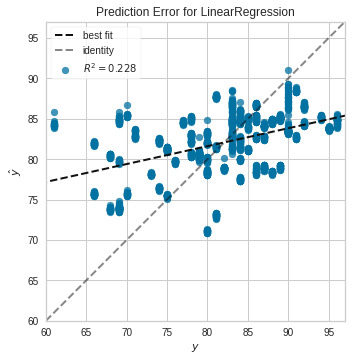

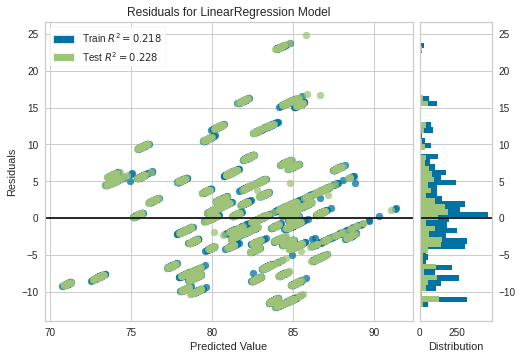

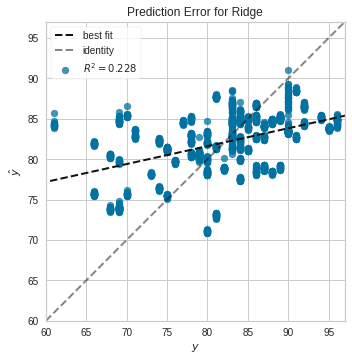

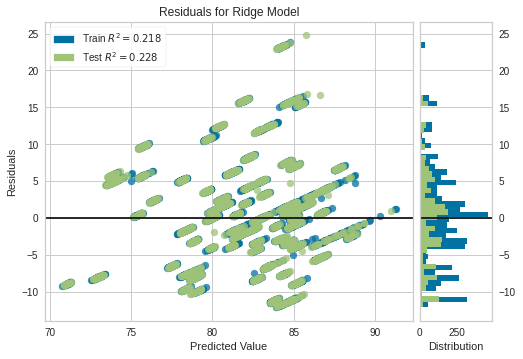

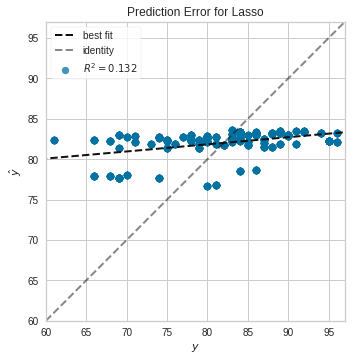

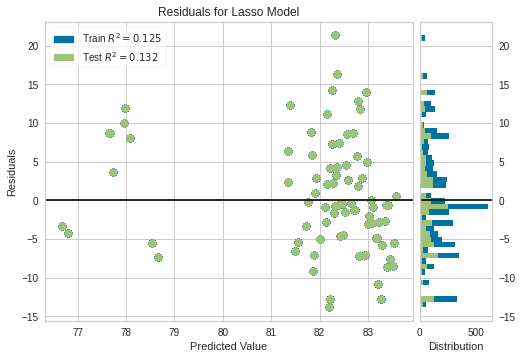

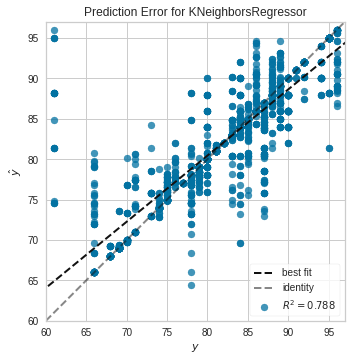

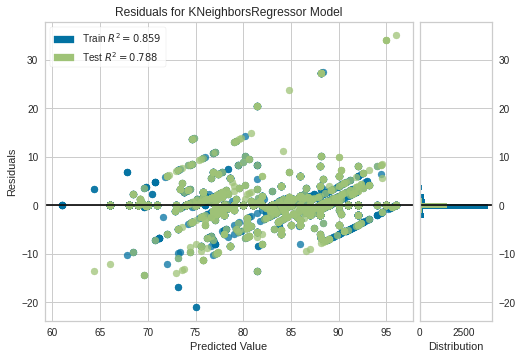

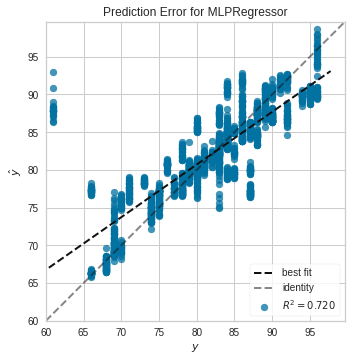

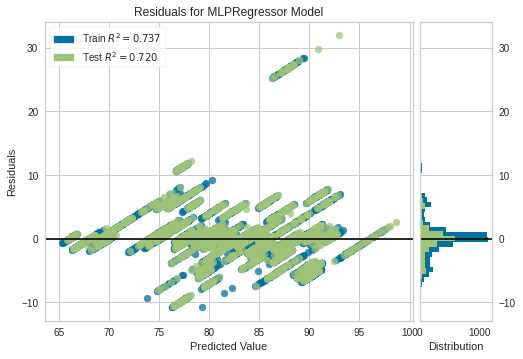

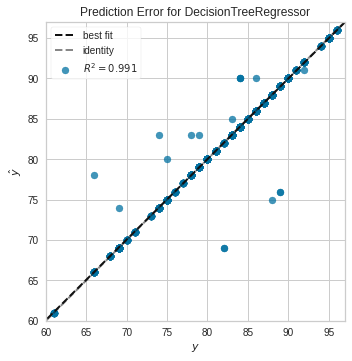

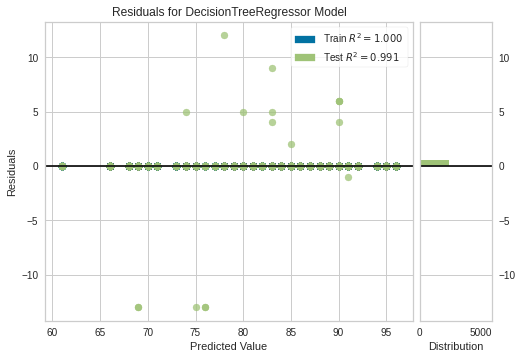

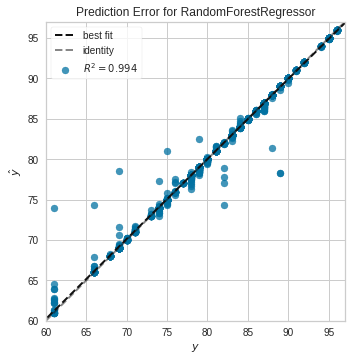

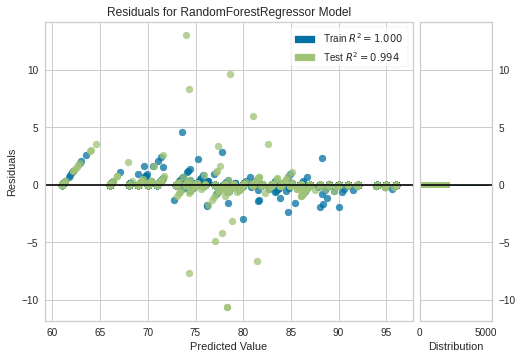

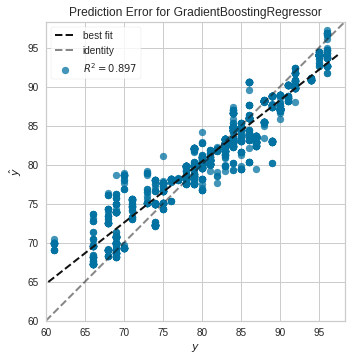

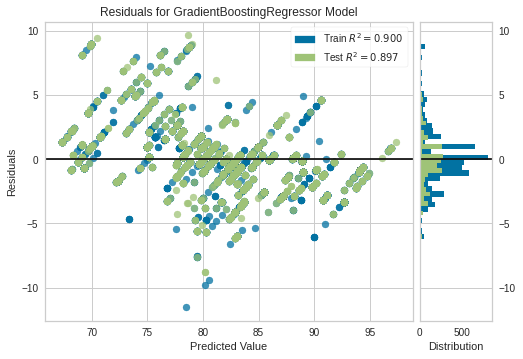

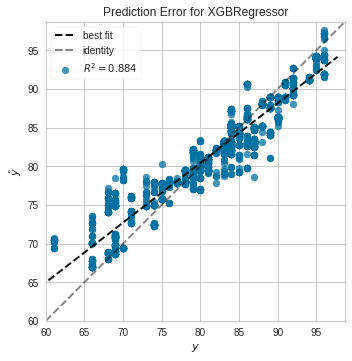

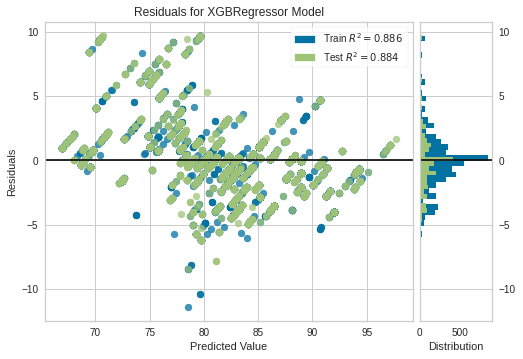

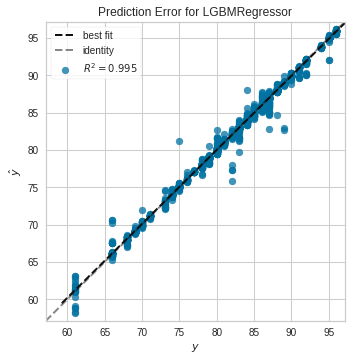

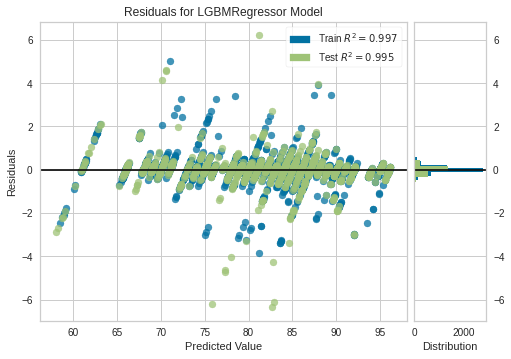

In [ ]:
for name, model in models.items():
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.poof()
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.poof()